# Holonomic Robot

![](pics/holonomic_robot.png)

**need to fix formatting**

Robots come in a variety of types and configurations: wheeled, tracked, legs, flying, etc. Common wheeled robots typically have two wheels (directly driven) with a caster wheel to make the robot stable. There are some without the caster wheel and employ a control system to keep them upright (inverted pendulum
problem) and resemble a Segway scooter. All of these two wheeled robot are
non-holonomic systems.

A **nonholonomic system** in physics and mathematics is a system whose state depends on the path taken in order to achieve it. A car is a typical example of a nonholonomic system. It can occupy any location (x,y) in any orientation ($\phi$), but the path from one location/orientation to another position/orientation is not always linear. Thus you have to parallel park.

A **holonomic system** is not constrained by this. Thus it can move anywhere at will. 

In [1]:
%matplotlib inline

In [2]:
from __future__ import division
from __future__ import print_function
import numpy as np
from numpy.linalg import norm 
from math import cos, sin, pi
import matplotlib.pyplot as plt

## Soccer

These types of robots are great for soccer, especially the goalie. Typical configuration are 3 or 4 motors. Omni wheels allow slip perpendicular to the axis.

Due to these constraints, a holonomic robot which could travel in any direction and immediately change its position and orientation is much more desirable. There are a variety of different wheels which make this type of robot possible such as mecanum or omni wheels.

![](pics/omni_wheel.jpg)

Omni wheels operate like standard wheels in that the force is produced normal to the motor's axis of rotation and as a result of friction. However, there are a series of smaller wheels which ring the main wheel and allow the wheel to slip in the direction of the motor rotational axis. Note that no force is produced parallel to the motor axis, just slippage.

## Dynamics

![](pics/omni_robot_cs.png)

The dynamics for a holonomic robot with 4 omni directional wheels (can be derived using Euler-Largrange ($\mathcal{L}$) which defines a system's kinectic ($T$) and potential ($V$) energies in relation to a set of generalized coordinates ($q$) and generalized forces ($Q$):

\begin{equation}
    \newcommand{\dpar}[2]{\frac{\partial #1}{\partial #2}}
\end{equation}

\begin{equation}
	\mathcal{L}=T-V \\
	\frac{d}{dt} \left\{ \dpar{ \mathcal{L} }{\dot q} \right\} - \dpar{ \mathcal{L} }{q} = Q \\
	T = \frac{1}{2}M v_w^2+ \frac{1}{2}J \dot \psi^2 + \frac{1}{2} J_w (\dot \theta_1^2 + \dot \theta_2^2 + \dot \theta_3^2 + \dot \theta_4^2) \\
	V = 0
\end{equation}

However, the dynamics must be calculated from an inertial reference frame (${W}$) and take into account the rotating body frame dynamics (${B'}$). Now, assume the body frame is offset from the center of mass (CM) by $x_m$ and $y_m$ which compose a vector $r_m$. Thus the velocity of the robot in the rotating frame would be:

\begin{equation*}
	v_w = v_{B'} + \dot \psi \times r_m \\
	v_w = v_{B'} +
	\begin{bmatrix}
		0 & 0 & \dot \psi
	\end{bmatrix}^T
	\times
	\begin{bmatrix}
		x_m & y_m & 0
	\end{bmatrix}^T
    =
	\begin{bmatrix}
		\dot x & \dot y & 0
	\end{bmatrix}^T +
	\begin{bmatrix}
		-y_m \dot \psi & x_m \dot \psi & 0
	\end{bmatrix}^T \\
	v_{B'} = \begin{bmatrix}
		\dot x & \dot y & 0
	\end{bmatrix}^T
\end{equation*}

where $v_{B'}$ is the speed of the body frame. Now substituting that into
the above kinetic energy equation $T$, we get:

\begin{equation}
	T = \frac{1}{2}M( ( \dot x - \dot \psi y )^2 + (\dot y + \dot \psi x)^2)+ \dots \\
	T = \frac{1}{2}M( \dot x^2 - 2 \dot \psi y_m \dot x +\dot \psi^2 y_m^2 + \dot y^2 + 2 \dot \psi x_m \dot y + \dot \psi^2 x_m^2)+ \frac{1}{2}J \dot \psi^2 + \frac{1}{2} J_w (\dot \theta_1^2 + \dot \theta_2^2 + \dot \theta_3^2 + \dot \theta_4^2)  \\
	\frac{d}{dt} \left\{ \dpar{ \mathcal{L} }{\dot x} \right\} = M ( \ddot x - \ddot \psi y - \dot \psi \dot y ) \hspace{1cm} \dpar{ \mathcal{L} }{x} = M(\dot \psi \dot y + \dot \psi^2 x) \\
	\frac{d}{dt} \left\{ \dpar{ \mathcal{L} }{\dot y} \right\} = M (\ddot y + \ddot \psi x + \dot \psi \dot x) \hspace{1cm} \dpar{ \mathcal{L} }{y} = M( -\dot \psi \dot x + \dot \psi^2 y) \\
	\frac{d}{dt} \left\{ \dpar{ \mathcal{L} }{\dot \psi} \right\} = J \ddot \psi \hspace{1cm} \dpar{ \mathcal{L} }{\phi} = 0 \\
	\frac{d}{dt} \left\{ \dpar{ \mathcal{L} }{\dot \theta} \right\} = J_w \sum \limits_{i=1}^4 \ddot \theta_i \hspace{1cm} \dpar{ \mathcal{L} }{\theta} = 0
\end{equation}

Now we make the following assumptions: ${B'}$ is coincident with
${B}$, $x_m = 0$, $y_m = 0$, $\dot x = v_x$,
$\dot y = v_y$

\begin{equation*}
	F_x = M (\ddot x - 2 \dot \psi \dot y ) \\
	F_y = M (\ddot y + 2 \dot \psi \dot x) \\
	T = J \ddot \psi \\
	\tau_w = J_w \ddot \theta_1 \hspace{1cm}
	\tau_w = J_w \ddot \theta_2 \hspace{1cm}
	\tau_w = J_w \ddot \theta_3 \hspace{1cm}
	\tau_w = J_w \ddot \theta_4
\end{equation*}


\begin{equation*}
	\begin{bmatrix}
		F_x \\
		F_y \\
		T
	\end{bmatrix} =
	\begin{bmatrix}
		M & 0 & 0 \\
		0 & M & 0 \\
		0 & 0 & J
	\end{bmatrix}
	\begin{bmatrix}
		\ddot x \\
		\ddot y \\
		\ddot \psi
	\end{bmatrix} +
	\begin{bmatrix}
		0 & -2M \dot \psi & 0 \\
		2M \dot \psi & 0 & 0 \\
		0 & 0 & 0
	\end{bmatrix}
	\begin{bmatrix}
		\dot x \\
		\dot y \\
		\dot \psi
	\end{bmatrix}
	= \mathcal{M} \ddot X + \mathcal{O} \dot X = Q
\end{equation*}

## World Coordinates

Now the dynamics derived so far are all in the body frame and we could stop
here and develop a controller which performs velocity control. However, position
control is more useful and a transform needs to be performed to move the
velocities and accelerations into the world frame.

\begin{equation}
	\dot X^W = R_B^W \dot X^B \\
	R_B^W =
	\begin{bmatrix}
		\cos \psi & \sin \psi & 0 \\
		-\sin \psi & \cos \psi & 0 \\
		0 & 0 & 1
	\end{bmatrix} \\
	\ddot X^W = \dot R_B^W \dot X^B + R_B^W \ddot X^B \\
	\dot R_B^W =
	\begin{bmatrix}
		\sin \psi & -\cos \psi & 0 \\
		\cos \psi & \sin \psi & 0 \\
		0 & 0 & 1
	\end{bmatrix}
\end{equation}

Now, substituting this into the dynamics, gives dynamics in the world
coordinate system of:

\begin{equation}
	F = \mathcal{M} (\dot R \dot X + R \ddot X )  + \mathcal{O} R \dot X \\
	F = \mathcal{M} R \ddot X + (\mathcal{M}  \dot R + \mathcal{O} R) \dot X
\end{equation}

## External Forces and Torques

![](pics/omni_robot_force_cs.png)

Now summing the forces into their body referenced $x$ and $y$ directions and the torque about the $z$ axis, gives us:

\begin{equation}
    \sum F_x=f_1 \sin(\phi) - f_2 \sin(\phi) - f_3 \sin(\phi) + f_4 \sin(\phi) \\
	\sum F_y=f_1 \cos(\phi) + f_2 \cos(\phi) - f_3 \cos(\phi) - f_4 \cos(\phi) \\
	\sum T=L(f_1+f_2+f_3+f_4)
\end{equation}

Additionally, we can simplify this by assuming all of the angles are the same
(e.g., $\phi_1 = \phi_2 = \phi_3 = \phi_4$) and can now put this into a
matrix form:

\begin{equation}
	\begin{bmatrix}
		F_x \\
		F_y \\
		T
	\end{bmatrix} =
	\begin{bmatrix}
		\sin(\phi) & 0 & 0 \\
		0 & \cos(\phi) & 0 \\
		0 & 0 & L
	\end{bmatrix}
	\begin{bmatrix}
		1 & -1 & -1 & 1\\
		1 & 1 & -1 & -1\\
		1 & 1 & 1& 1
	\end{bmatrix}
	\begin{bmatrix}
		f_1 \\
		f_2 \\
		f_3 \\
		f_4
	\end{bmatrix}
\end{equation}

where $\phi$ is again the angle of the motors, $f_i$ is the magnitude of the force produced by the motors, and $L$ is the radius of the robot.

where $pinv()$ is defined as the pseudoinverse since $A(\phi)$ is not a square matrix. Finally, substituting these into the original equation, we can calculate the torques given the desired accelerations.

\begin{equation}
	\begin{bmatrix} \tau_1 \\  \tau_2 \\  \tau_3 \\  \tau_4 \end{bmatrix} = \frac {M r_w} {4}
	\begin{bmatrix}
		-1 & 1 & 1 \\
		-1 & -1 & 1 \\
		1 & -1 & 1 \\
		1 & 1 & 1
	\end{bmatrix}
	\begin{bmatrix}
		\frac{1}{\sin(\phi)} & 0 & 0 \\
		0 & \frac{1}{\cos(\phi)} & 0 \\
		0 & 0 & \frac{1}{2}
	\end{bmatrix}
	\begin{bmatrix}
		a_x \\
		a_y \\
		R \dot \omega
	\end{bmatrix}
\end{equation}

Now looking at this equation, we notice that $\phi$ can not be equal to 0, 90, 180, 270, or 360 otherwise we get a singularity in the $A(\phi)$ matrix. This however is not an issue in the real world, since the motors would occupy the same physical space and the robot would essentially only have 2 and not 4 motors.

## Holonomic Robot Kinematics

Number of equivalent motors for any direction under linear movement only, no rotational movement allowed.

Now performing a similar exercise for what was done with the dynamics, looking
at $coordinate$, the velocity of motor 1is given by
$v_1 = -\sin(\phi) v_x + \cos(\phi) v_y + R \omega$. Performing this for
each wheel gives:

\begin{equation}
	\begin{bmatrix}
		v_1 \\
		v_2 \\
		v_3 \\
		v_4
	\end{bmatrix} =
	\begin{bmatrix}
		-\sin(\phi)  & \cos(\phi) & L \\
		-\sin(\phi) & -\cos(\phi) & L \\
		 \sin(\phi) & -\cos(\phi) & L \\
		 \sin(\phi)  & \cos(\phi) & L
	\end{bmatrix}
	\begin{bmatrix}
		v_x \\
		v_y \\
		\omega
	\end{bmatrix} =
	\begin{bmatrix}
		-1 & 1 & 1 \\
		-1 & -1 & 1 \\
		1 & -1 & 1 \\
		1 & 1 & 1
	\end{bmatrix}
	\begin{bmatrix}
		\sin(\phi) & 0 & 0 \\
		0 & \cos(\phi) & 0 \\
		0 & 0 & L
	\end{bmatrix}
	\begin{bmatrix}
		v_x \\
		v_y \\
		\omega
	\end{bmatrix}
\end{equation}

Now setting $\omega$ to zero and calculating only linear movement, we can
determine the number of equivalent motors as shown in
\figref{fig:equivalent_motors}. For example, setting
$\phi$ to 30 $^\circ$ (the red line in \figref{fig:equivalent_motors})
and traveling in the x direction only ($\begin{bmatrix} v_x & v_y & \omega \end{bmatrix}^T = \begin{bmatrix}1& 0 & 0 \end{bmatrix}^T$),
the above equation simplifies to $4 \sin(30)$ or 2 equivalent motors.
Repeating for the y direction results in $4 \cos(30)$ or 3.46 equivalent
motors.

Now it is interesting to note that when $\phi$ is set to 30 $^\circ$,
the robot has more equivalent motors when going forward or backwards, while a
$\phi$ of 60 $^\circ$ provides more equivalent motors moving left or right.
When the motors are are angled at 45 $^\circ$, movement is clearly equally
optimized for both forward/backwards and left/right ( $2 \sin(45)$ is 2.83 motors)
movement.

\figref{fig:equivalent_motors} tells us that no mater how the 4 motors are
oriented in a realistic configuration, the robot will never have the equivalent
use of all 4 motors. Movement in one direction or another can be optimized, but
then a sacrifice is made in another direction. This fact is intuitively obvious.

Another issue is these results are also ideal. This logic assumes that the wheels
will not slip and have good traction in any orientation. Unfortunately real world
results do not mimic this situation and the robot's performance will be reduced.


## Equvilent Motors

Since this robot has 4 motors with omni wheels, in certain configurations, you can get more power/speed in certain directions than others. Let's look at a configuration with the wheels oriented at the $\phi$ angles of: 30, 45, and 60 degrees.

In [3]:
def motors(phi, angles):
    """
    in:
        phi - orientation of motors
        angles - array of angles from 0 ... 2*pi
    out:
        array of results
    """
    phi = phi*pi/180
    ans = []
    for angle in angles:
        a = np.array([
                [-sin(phi),  cos(phi), 1.0],
                [-sin(phi), -cos(phi), 1.0],
                [ sin(phi), -cos(phi), 1.0],
                [ sin(phi),  cos(phi), 1.0]
            ])
        b = np.array([
                cos(angle),
                sin(angle),
                0.0
            ])
        v = sum(abs(a.dot(b)))
        ans.append(v)
    return ans

In [4]:
theta = np.arange(0,2*pi,0.1)
em30 = motors(30, theta)
em45 = motors(45, theta)
em60 = motors(60, theta)

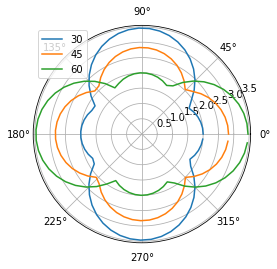

In [5]:
plt.polar(theta, em30, label='30');
plt.polar(theta, em45, label='45');
plt.polar(theta, em60, label='60');
plt.grid(True)
plt.legend(loc='upper left');

As seen above, 30 and 60 degrees orientations favor certain directions. However, 45 degrees is better in all directions and all around movement.

## Control

![](pics/omni_wheel_control.png)

Using the equations above to transform desired movement into motor actions, the robot can move in any direction. A basic summery of robot movement to motor direction is shown above.

# References

---

* Alexander Gloye, Raul Rojas, Holonomic Control of a Robot with an Omnidirectional Drive, accepted for publication by Künstliche Intelligenz, Springer-Verlag, 2006.

* http://en.wikipedia.org/wiki/Non-holonomic_system

* http://en.wikipedia.org/wiki/Lagrangian_mechanics

* http://www.kornylak.com

* R. Balakrishna, Ashitava Ghosal, "Modeling of Slip for Wheeled Mobile Robots," lEEE TRANSACTIONS ON ROBOTICS AND AUTOMATION, VOL. I I , NO. I , FEBRUARY 1995, pp. 126-132

* J. Agullo, S. Cardona, and J. Vivancos, “Kinematics of vehicles with directional sliding wheels,” Mechanisms and Muchine Theory, vol. 22, no. 4, pp. 295-301, 1987.

* Pseudoinverse: for m > n: $A_{left}^{-1}=(A^TA)^{-1}A^T$ or m < n: $A_{right}^{-1} = A^T(AA^T)^{-1}$ such that $AA^{-1}=I$ or $A^{-1}A=I$

* Masayoshi Wada (2010). Motion Control of a Four-wheel-drive Omnidirectional Wheelchair with High Step Climbing Capability, Climbing and Walking Robots, Behnam Miripour (Ed.), ISBN: 978-953-307-030-8, [InTech](http://www.intechopen.com/books/climbing-and-walking-robots/motion-control-of-a-four-wheeldrive-omnidirectional-wheelchair-with-high-step-climbing-capability)

-----------

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.